# Modul 6 - Praca domowa - Python

Zwykle istnieje wiele sposobów, żeby rozwiązać zadanie w Python. Także czasami warto spróbować opracować kod na 1-2 sposoby :)

## Zadanie

<img src="https://bit.ly/2QvpWV7" width="800">

> Wykorzystaj [Źródło Danych od NASA](https://bit.ly/2EuNqqk) do znajdowania potencjalnie niebezpiecznych oraz bezpiecznych asteroid. Dane dotyczą Asteroid - NeoWs. NeoWs (Near Earth Object Web Service) to usługa internetowa dostępna dla informacji o asteroidach bliskich ziemi. Postępuj wg. kroków:





>1.   Wczytaj dane wykorzystując link: https://bit.ly/2CV8tlG

In [ ]:
#library import
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import compose
from sklearn import covariance
from sklearn import impute
from sklearn import model_selection
from sklearn import decomposition
from sklearn.feature_selection import VarianceThreshold

URL = 'https://bit.ly/2CV8tlG'
df = pd.read_csv(URL)
df.head()

Neo Reference ID     Name  ...  Equinox  Hazardous
0           3703080  3703080  ...    J2000       True
1           3723955  3723955  ...    J2000      False
2           2446862  2446862  ...    J2000       True
3           3092506  3092506  ...    J2000      False
4           3514799  3514799  ...    J2000       True

[5 rows x 40 columns]

In [ ]:
#removal of unnecessary columns - need a list of them for that
df.columns


Index(['Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Relative Velocity km per sec', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')

>2. Usuń cechy nieistotne, przykładowo:<br>**Reference ID, Name, Close Approach Date, Epoch Date Close Approach, Orbit Determination Date, Orbiting Body, Equinox**

In [ ]:
df.drop(axis=1, columns = ['Neo Reference ID', 'Est Dia in Miles(min)','Est Dia in Miles(max)', 'Relative Velocity km per hr','Miles per hour', 'Miss Dist.(miles)','Miss Dist.(lunar)', 'Miss Dist.(Astronomical)',  'Est Dia in M(min)','Est Dia in M(max)','Est Dia in Feet(min)','Est Dia in Feet(max)' , 'Close Approach Date', 'Epoch Date Close Approach', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], inplace=True )
df.head()

Name  Absolute Magnitude  ...  Mean Motion  Hazardous
0  3703080                21.6  ...     0.590551       True
1  3723955                21.3  ...     0.845330      False
2  2446862                20.3  ...     0.559371       True
3  3092506                27.4  ...     0.700277      False
4  3514799                21.6  ...     0.726395       True

[5 rows x 23 columns]

>3. Przygotuj podstawową analizę dotyczącą rozkładu cech oraz zależności między nimi. 

In [ ]:
#basic statistical information about distribution of values
df.describe(include ='all')

Name  Absolute Magnitude  ...  Mean Motion  Hazardous
count   4.687000e+03         4687.000000  ...  4687.000000       4687
unique           NaN                 NaN  ...          NaN          2
top              NaN                 NaN  ...          NaN      False
freq             NaN                 NaN  ...          NaN       3932
mean    3.272298e+06           22.267865  ...     0.738242        NaN
std     5.486011e+05            2.890972  ...     0.342627        NaN
min     2.000433e+06           11.160000  ...     0.086285        NaN
25%     3.097594e+06           20.100000  ...     0.453289        NaN
50%     3.514799e+06           21.900000  ...     0.712946        NaN
75%     3.690060e+06           24.500000  ...     0.984669        NaN
max     3.781897e+06           32.100000  ...     2.039000        NaN

[11 rows x 23 columns]

In [ ]:
#correlation matrix
df.corr()


Name  ...  Hazardous
Name                          1.000000  ...  -0.269028
Absolute Magnitude            0.602381  ...  -0.325522
Est Dia in KM(min)           -0.499821  ...   0.132424
Est Dia in KM(max)           -0.499821  ...   0.132424
Relative Velocity km per sec -0.165032  ...   0.191970
Miss Dist.(kilometers)       -0.155782  ...   0.032407
Orbit ID                     -0.651200  ...   0.247369
Orbit Uncertainity            0.611205  ...  -0.328721
Minimum Orbit Intersection   -0.158673  ...  -0.288949
Jupiter Tisserand Invariant  -0.004854  ...  -0.003404
Epoch Osculation              0.006023  ...   0.040940
Eccentricity                 -0.125071  ...   0.183269
Semi Major Axis               0.035865  ...  -0.010770
Inclination                  -0.175461  ...   0.009607
Asc Node Longitude           -0.026381  ...   0.017536
Orbital Period                0.040058  ...  -0.011168
Perihelion Distance           0.130486  ...  -0.207027
Perihelion Arg               -0.007669  ...  -0.003865
Aphelion Dist                 0.006318  ...   0.040800
Perihelion Time               0.003031  ...   0.038113
Mean Anomaly                 -0.051685  ...   0.054164
Mean Motion                  -0.020719  ...   0.013028
Hazardous                    -0.269028  ...   1.000000

[23 rows x 23 columns]

In [ ]:
df.columns

Index(['Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Relative Velocity km per sec',
       'Miss Dist.(kilometers)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous'],
      dtype='object')

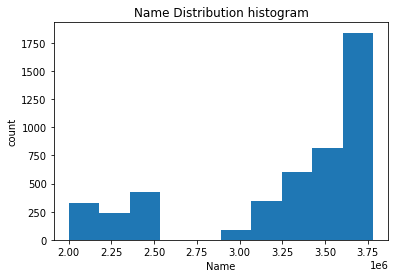

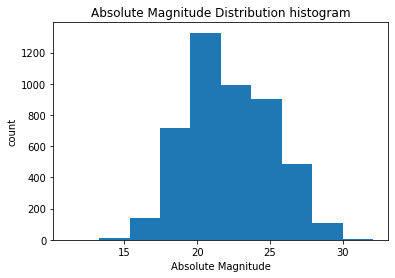

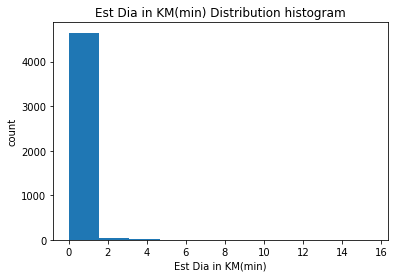

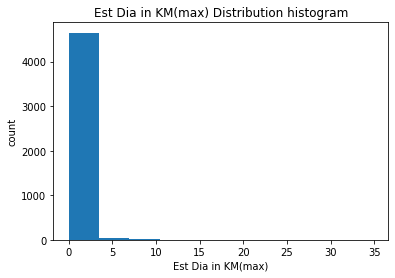

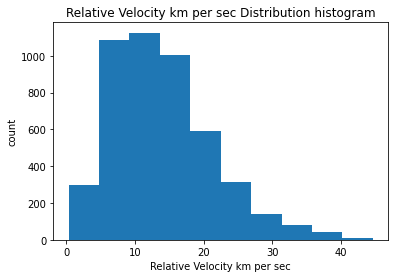

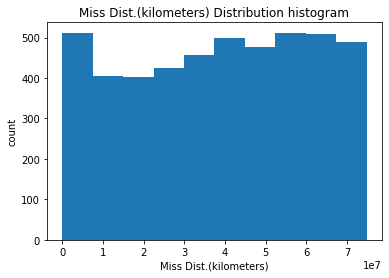

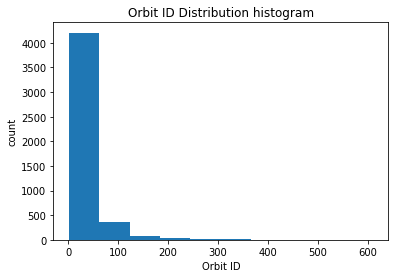

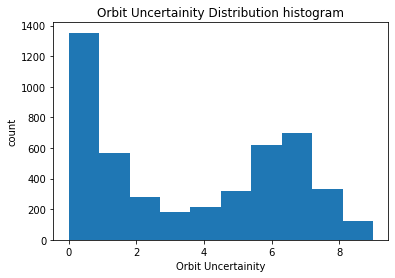

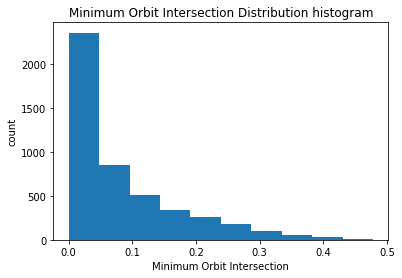

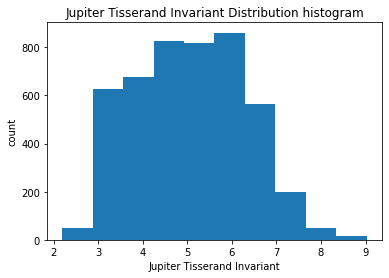

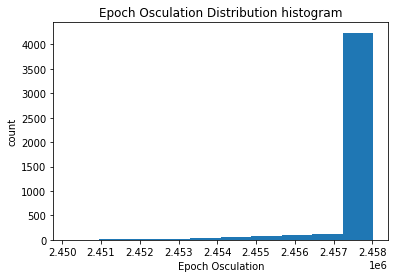

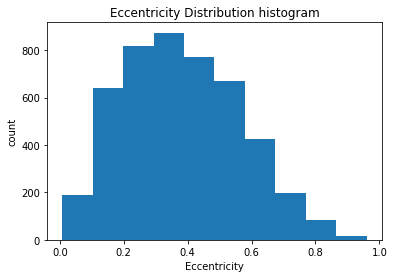

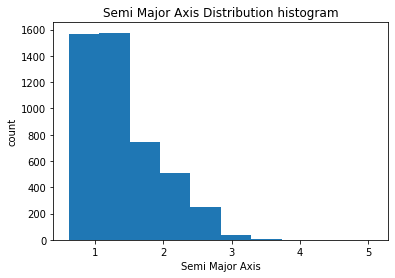

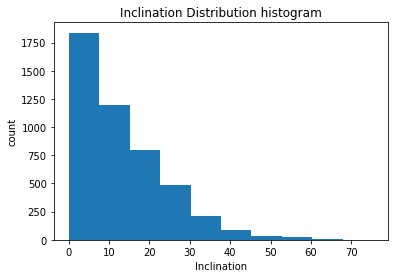

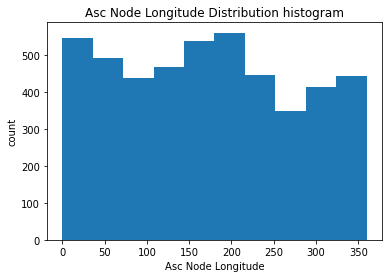

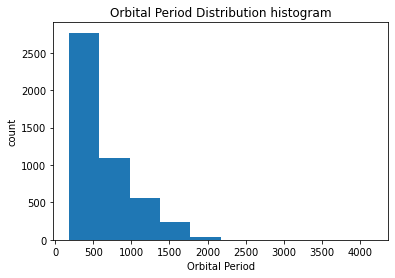

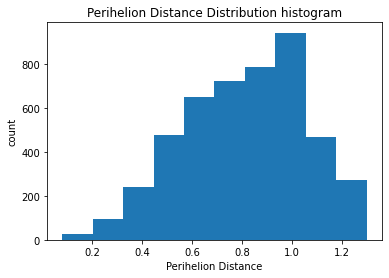

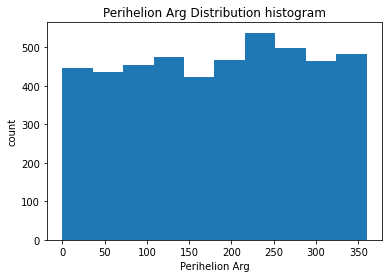

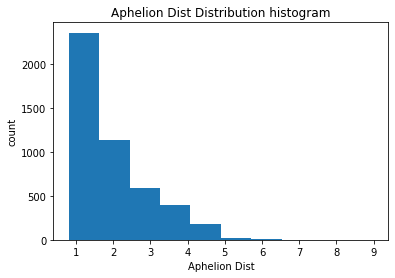

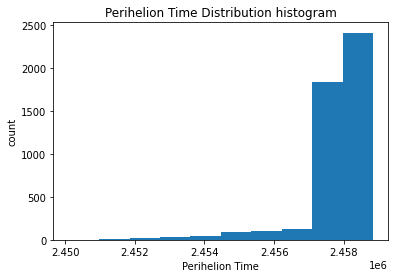

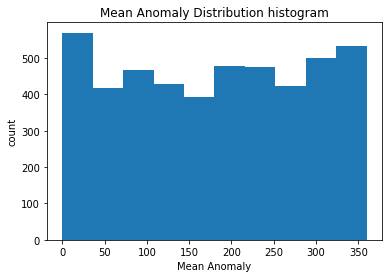

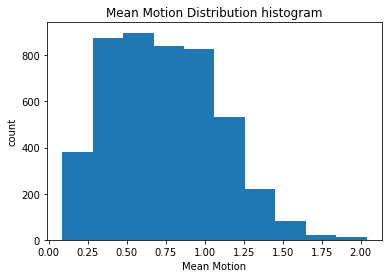

In [ ]:
#data distribution - list of histograms
#the for loop below is bugging out for the Hazardous column - need to drop it
df2 = df.drop(axis=1, columns='Hazardous')
for column in df2.columns:
  plt.hist(column, data = df2)
  plt.title(label = column + ' Distribution histogram')
  plt.ylabel(ylabel = 'count')
  plt.xlabel(xlabel= column)
  plt.show()

In [ ]:
#visualisation of relationships between data within given columns
df2 = df.drop(axis=1, columns='Hazardous')
kolumny = pd.Index(df2.columns).tolist()
wykres = px.scatter_matrix(df2, hover_name = "Name") #adding hover_name = "Name" to spot outliers more easily
wykres.update_layout(autosize=False, width = 2400, height = 2400)
wykres.show()

>4. Spradź czy występują braki danych oraz wartości odstające, w razie potrzeby wyeliminuj problemy wykorzystując omawiane poprzednio podejścia (Lekcja 6 i 7). 

In [ ]:
#check for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()
#no missing values

Total  Percent
Hazardous               0      0.0
Epoch Osculation        0      0.0
Absolute Magnitude      0      0.0
Est Dia in KM(min)      0      0.0
Est Dia in KM(max)      0      0.0

In [ ]:
#checking for outliers
df2 = df.drop(axis=1, columns='Hazardous')
for column in df2.columns:
  wykres = px.box(x= column, data_frame = df2, hover_name = "Name", title = column + ' Box plot', orientation = 'h', notched = True)
   #plt.xlabel(xlabel= column)
  wykres.show()

In [ ]:
#Noting down IDs (Names) found manually. Criteria - often outside of box plot description range.
names = ['2418265', '3588021', '3743895', '2000433']


In [ ]:
#Checking for outliers using EllipticEnvelope
#utworzenie detektora wartości odstających na podstawie elipsy wokół danych
import collections
detector = covariance.EllipticEnvelope(contamination=0.01)
# użycie detektora
detector.fit(df)
# wykrywanie wartości odstających
outliers = detector.predict(df)
print(collections.Counter(outliers)) # lets count how many outliers are found with this method
outliers
df_EE = df
df_EE['Outlier']=outliers #adding a column with outliers predicted by the algorithm

#creating a dataframe df_1 with removed outliers - detected by EllipticEnvelops
df_1 = df_EE[df_EE['Outlier'] == 1]
df_1.drop(axis=1, columns ='Outlier', inplace = True)
df_1.info() #rows have been removed


/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning:

The covariance matrix associated to your dataset is not full rank

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (5.063719810555350 > 3.210543143376935). You may want to try with a higher value of support_fraction (current value: 0.503).

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.042448093127240 > -6.005745256275349). You may want to try with a higher value of support_fraction (current value: 0.503).

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:170: RuntimeWarning:

Determinant has increased; this should not happen: log(det) > log(previous_det) (0.078216793877219 > -5.9290279042

Counter({1: 4640, -1: 47})
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 0 to 4686
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4640 non-null   int64  
 1   Absolute Magnitude            4640 non-null   float64
 2   Est Dia in KM(min)            4640 non-null   float64
 3   Est Dia in KM(max)            4640 non-null   float64
 4   Relative Velocity km per sec  4640 non-null   float64
 5   Miss Dist.(kilometers)        4640 non-null   float64
 6   Orbit ID                      4640 non-null   int64  
 7   Orbit Uncertainity            4640 non-null   int64  
 8   Minimum Orbit Intersection    4640 non-null   float64
 9   Jupiter Tisserand Invariant   4640 non-null   float64
 10  Epoch Osculation              4640 non-null   float64
 11  Eccentricity                  4640 non-null   float64
 12  Semi Major Axis               4640 

In [ ]:
#Scatterplot distribution of outliers across different parameters. Is there a pattern?
df2 = df.drop(axis=1, columns='Hazardous')
for column in df2.columns:
  wykres = px.scatter(x= column, data_frame = df2, hover_name = "Name", title = column + ' Outlier detection scatterplot', color = outliers)
  wykres.show()

#After running the code - we can notice that there is high dependability between being an outlier and size of the asteroid (Est Dia in KM min/max), Orbit ID, Orbit Uncertainity, Epoch Osculation and Perihelion Time

In [ ]:
#checking for outliers with IQR method. Creation of anomaly detection function
#need to use collections.Counter to see how many "outlier" flags are given
import collections

def IQR_outliers(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (1.5 * IQR)
  dolne_ograniczenie  = Q1 - (1.5 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  print(" Q1 = ", Q1, "\n","Q3 =", Q3, "\n") 
  return b

outlier_columns = ['Est Dia in KM(max)', 'Est Dia in KM(min)', 'Orbit ID', 'Epoch Osculation', 'Perihelion Time', 'Orbit Uncertainity']

# usage of function
for column in outlier_columns:
  print("Flaga dla kolumny: ", column)
  flaga_IQR = IQR_outliers(df[column])
  print("Flaga_IQR: ", flaga_IQR)
  print(collections.Counter(flaga_IQR), "\n\n\n")



Flaga dla kolumny:  Est Dia in KM(max)
Górne ograniczenie: 1.3067563758499998
Dolne ograniczenie: -0.6643356853499999
 Q1 =  0.0748238376 
 Q3 = 0.5675968529 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4377, -1: 310}) 



Flaga dla kolumny:  Est Dia in KM(min)
Górne ograniczenie: 0.5843992174000001
Dolne ograniczenie: -0.29709995060000005
 Q1 =  0.033462237400000004 
 Q3 = 0.2538370294 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4377, -1: 310}) 



Flaga dla kolumny:  Orbit ID
Górne ograniczenie: 64.0
Dolne ograniczenie: -24.0
 Q1 =  9.0 
 Q3 = 31.0 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4229, -1: 458}) 



Flaga dla kolumny:  Epoch Osculation
Górne ograniczenie: 2458000.5
Dolne ograniczenie: 2458000.5
 Q1 =  2458000.5 
 Q3 = 2458000.5 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4048, -1: 639}) 



Flaga dla kolumny:  Perihelion Time
Górne ograniczenie: 2458547.8966178712
Dolne ograniczenie: 2457375.480764561
 Q1 =  2457815.1367095523 
 Q3 = 2458108.24067288 

Flaga_IQR:  [1 1 1 .

In [ ]:
#That is a lot of outliers. Lets try again with more restrictive IQR approach
def IQR_outliers(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (3 * IQR)
  dolne_ograniczenie  = Q1 - (3 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  print(" Q1 = ", Q1, "\n","Q3 =", Q3, "\n") 
  return b

outlier_columns = ['Est Dia in KM(max)', 'Est Dia in KM(min)', 'Orbit ID', 'Perihelion Time', 'Orbit Uncertainity']

# usage of function
for column in outlier_columns:
  print("Flaga dla kolumny: ", column)
  flaga_IQR = IQR_outliers(df[column])
  print("Flaga_IQR: ", flaga_IQR)
  print(collections.Counter(flaga_IQR), "\n\n\n")

#Epoch osculation generates a lot of outliers - removing this column from possible outlier_columns list
#after re-running code - much better now

Flaga dla kolumny:  Est Dia in KM(max)
Górne ograniczenie: 2.0459158987999997
Dolne ograniczenie: -1.4034952082999999
 Q1 =  0.0748238376 
 Q3 = 0.5675968529 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4545, -1: 142}) 



Flaga dla kolumny:  Est Dia in KM(min)
Górne ograniczenie: 0.9149614054000001
Dolne ograniczenie: -0.6276621386000001
 Q1 =  0.033462237400000004 
 Q3 = 0.2538370294 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4545, -1: 142}) 



Flaga dla kolumny:  Orbit ID
Górne ograniczenie: 97.0
Dolne ograniczenie: -57.0
 Q1 =  9.0 
 Q3 = 31.0 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4486, -1: 201}) 



Flaga dla kolumny:  Perihelion Time
Górne ograniczenie: 2458987.5525628626
Dolne ograniczenie: 2456935.8248195695
 Q1 =  2457815.1367095523 
 Q3 = 2458108.24067288 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({1: 4282, -1: 405}) 



Flaga dla kolumny:  Orbit Uncertainity
Górne ograniczenie: 24.0
Dolne ograniczenie: -18.0
 Q1 =  0.0 
 Q3 = 6.0 

Flaga_IQR:  [1 1 1 ... 1 1 1]
Counter({

In [ ]:
#creating df_2 dataframe which has outliers found by IQR (with increased range) removed
df_2 = df #copy of dataframe
#assigning the dataframe to a filtered version of itself
df_2 = df_2[df_2['Est Dia in KM(max)'] > -1.4034952082999999]
df_2 = df_2[df_2['Est Dia in KM(max)'] < 2.0459158987999997]
df_2 = df_2[df_2['Est Dia in KM(min)'] > -0.6276621386000001]
df_2 = df_2[df_2['Est Dia in KM(min)'] < 0.9149614054000001]
df_2 = df_2[df_2['Orbit ID'] > -57]
df_2 = df_2[df_2['Orbit ID'] < 97]
df_2 = df_2[df_2['Perihelion Time'] > -2456935.8248195695]
df_2 = df_2[df_2['Perihelion Time'] < 2458987.5525628626]
df_2.drop(axis=1, columns='Outlier', inplace = True)
df_2.info()
#it works - we have 4421 rows instead of 4680ish

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 0 to 4686
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4423 non-null   int64  
 1   Absolute Magnitude            4423 non-null   float64
 2   Est Dia in KM(min)            4423 non-null   float64
 3   Est Dia in KM(max)            4423 non-null   float64
 4   Relative Velocity km per sec  4423 non-null   float64
 5   Miss Dist.(kilometers)        4423 non-null   float64
 6   Orbit ID                      4423 non-null   int64  
 7   Orbit Uncertainity            4423 non-null   int64  
 8   Minimum Orbit Intersection    4423 non-null   float64
 9   Jupiter Tisserand Invariant   4423 non-null   float64
 10  Epoch Osculation              4423 non-null   float64
 11  Eccentricity                  4423 non-null   float64
 12  Semi Major Axis               4423 non-null   float64
 13  Inc

In [ ]:
#Removing outliers from the dataframe. 
#Lets describe dataframes for future comparisons
#df_1 is a dataframe with removed outliers which were found with the EllipticEnvelope
#df_2 is a dataframe with removed outliers which were found with the IQR_outliers function with increased IQR (3 instead of 1.5)
df_1.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 0 to 4686
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4640 non-null   int64  
 1   Absolute Magnitude            4640 non-null   float64
 2   Est Dia in KM(min)            4640 non-null   float64
 3   Est Dia in KM(max)            4640 non-null   float64
 4   Relative Velocity km per sec  4640 non-null   float64
 5   Miss Dist.(kilometers)        4640 non-null   float64
 6   Orbit ID                      4640 non-null   int64  
 7   Orbit Uncertainity            4640 non-null   int64  
 8   Minimum Orbit Intersection    4640 non-null   float64
 9   Jupiter Tisserand Invariant   4640 non-null   float64
 10  Epoch Osculation              4640 non-null   float64
 11  Eccentricity                  4640 non-null   float64
 12  Semi Major Axis               4640 non-null   float64
 13  Inc

>5. Wyeliminuj mało istotne oraz silnie zależne cechy. Przeprowadź kodowanie cech kategorycznych, np. `Orbit ID`.

In [ ]:
#encoding of categorical values - columns ORBIT ID, ORBIT UNCERTAINITY
df_1_encoded = pd.get_dummies(df_1, columns=["Orbit ID", "Orbit Uncertainity"], prefix_sep="_")
df_2_encoded = pd.get_dummies(df_2, columns=["Orbit ID", "Orbit Uncertainity"], prefix_sep="_")
df_1_encoded.head()

Name  Absolute Magnitude  ...  Orbit Uncertainity_8  Orbit Uncertainity_9
0  3703080                21.6  ...                     0                     0
1  3723955                21.3  ...                     0                     0
2  2446862                20.3  ...                     0                     0
3  3092506                27.4  ...                     0                     0
4  3514799                21.6  ...                     0                     0

[5 rows x 219 columns]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



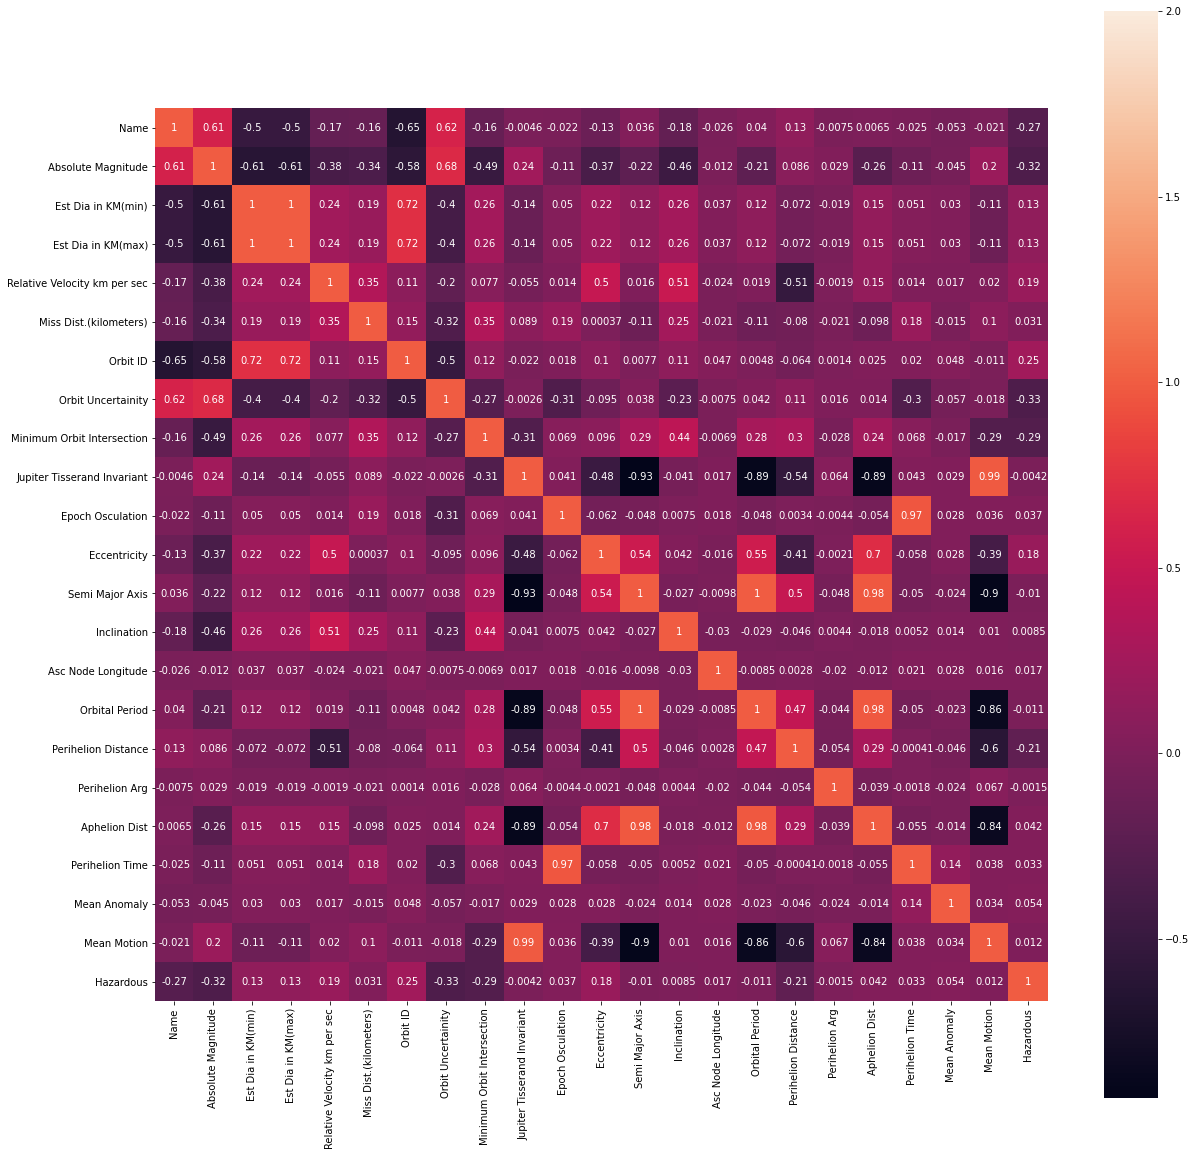

In [ ]:
#looking for correlated values
#lightly correlated values - corr coeffictient <0.3
#highly correlated values - corr coefficient >0.9
#assumption - correlations and variances within df_1 and df_2 will be similar enough not to consider both dataframes separately.
import seaborn as sns
#drawing of heatmap
corrmat = df_1.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=2, square=True, annot = True);

#some high positive and negative correlations can be spotted

In [ ]:
#check and removal of too low and too high correlation
correlation_1 = df_1.corr().abs()
correlation_2 = df_2.corr().abs()
print(correlation_1)
#print(correlation_1-correlation_2) #check this for differences between correlation coefficients considering different methods of removing outliers

                                  Name  ...  Hazardous
Name                          1.000000  ...   0.270078
Absolute Magnitude            0.606273  ...   0.323974
Est Dia in KM(min)            0.502440  ...   0.131247
Est Dia in KM(max)            0.502440  ...   0.131247
Relative Velocity km per sec  0.165733  ...   0.191306
Miss Dist.(kilometers)        0.159314  ...   0.031219
Orbit ID                      0.652963  ...   0.247081
Orbit Uncertainity            0.622567  ...   0.329679
Minimum Orbit Intersection    0.161771  ...   0.291043
Jupiter Tisserand Invariant   0.004638  ...   0.004236
Epoch Osculation              0.022115  ...   0.037146
Eccentricity                  0.125449  ...   0.183575
Semi Major Axis               0.036117  ...   0.010019
Inclination                   0.178358  ...   0.008536
Asc Node Longitude            0.025731  ...   0.017120
Orbital Period                0.040361  ...   0.010529
Perihelion Distance           0.130715  ...   0.206491
Perihelion

In [ ]:
#definition of filtering matrix
filter_matrix_1= np.triu(np.ones(correlation_1.shape), k=1).astype(np.bool)
filtered_1 = correlation_1.where(filter_matrix_1)
filter_matrix_2= np.triu(np.ones(correlation_2.shape), k=1).astype(np.bool)
filtered_2 = correlation_2.where(filter_matrix_2)
filtered_1.max()- filtered_2.max() #again some differences
#filtered_2.max()
print("Max correlations of df_1: \n", filtered_1.max())
print("Max correlations of df_2: \n", filtered_2.max())

Max correlations of df_1: 
 Name                                 NaN
Absolute Magnitude              0.606273
Est Dia in KM(min)              0.613120
Est Dia in KM(max)              1.000000
Relative Velocity km per sec    0.376778
Miss Dist.(kilometers)          0.353408
Orbit ID                        0.724320
Orbit Uncertainity              0.680748
Minimum Orbit Intersection      0.487953
Jupiter Tisserand Invariant     0.308263
Epoch Osculation                0.312035
Eccentricity                    0.497840
Semi Major Axis                 0.929963
Inclination                     0.514892
Asc Node Longitude              0.047204
Orbital Period                  0.995235
Perihelion Distance             0.537819
Perihelion Arg                  0.063782
Aphelion Dist                   0.977545
Perihelion Time                 0.965849
Mean Anomaly                    0.137342
Mean Motion                     0.992663
Hazardous                       0.329679
dtype: float64
Max correlatio

In [ ]:
#description of indexes with too high corelation
strong_correlation_1 = [column for column in filtered_1.columns if any(filtered_1[column] > 0.9)]
print(strong_correlation_1)
strong_correlation_2 = [column for column in filtered_2.columns if any(filtered_2[column] > 0.9)]
print(strong_correlation_2)
df_1_encoded.drop(columns = strong_correlation_1, inplace = True, errors = 'ignore')
df_2_encoded.drop(columns = strong_correlation_2, inplace = True, errors = 'ignore')
df_2_encoded.head()

['Est Dia in KM(max)', 'Semi Major Axis', 'Orbital Period', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion']
['Est Dia in KM(max)', 'Semi Major Axis', 'Orbital Period', 'Aphelion Dist', 'Perihelion Time', 'Mean Motion']


Name  Absolute Magnitude  ...  Orbit Uncertainity_8  Orbit Uncertainity_9
0  3703080                21.6  ...                     0                     0
1  3723955                21.3  ...                     0                     0
2  2446862                20.3  ...                     0                     0
3  3092506                27.4  ...                     0                     0
4  3514799                21.6  ...                     0                     0

[5 rows x 120 columns]

In [ ]:
#description of indexes with too low corelation
weak_correlation_1 = [column for column in filtered_1.columns if any(filtered_1[column] < 0.3)]
print(weak_correlation_1)
weak_correlation_2 = [column for column in filtered_2.columns if any(filtered_2[column] < 0.3)]
print(weak_correlation_2)
df_1_encoded.drop(columns = weak_correlation_1, inplace = True, errors = 'ignore')
df_2_encoded.drop(columns = weak_correlation_2, inplace = True, errors = 'ignore')
df_1_encoded.head()

['Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']
['Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Orbit ID', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Hazardous']


Name  Absolute Magnitude  ...  Orbit Uncertainity_8  Orbit Uncertainity_9
0  3703080                21.6  ...                     0                     0
1  3723955                21.3  ...                     0                     0
2  2446862                20.3  ...                     0                     0
3  3092506                27.4  ...                     0                     0
4  3514799                21.6  ...                     0                     0

[5 rows x 201 columns]

>6. Podziel zbiór danych na zbiór uczący i testowy (proporcja `80%` i `20%` odpowiednio), definiując cechę `Hazardous` jako target/zmienną objaśnianą (Y).

In [ ]:
#we need the Hazardous column back
df_1_encoded['Hazardous']=df_1['Hazardous']
df_2_encoded['Hazardous']=df_2['Hazardous']
df_2_encoded.head()

Name  Absolute Magnitude  ...  Orbit Uncertainity_9  Hazardous
0  3703080                21.6  ...                     0       True
1  3723955                21.3  ...                     0      False
2  2446862                20.3  ...                     0       True
3  3092506                27.4  ...                     0      False
4  3514799                21.6  ...                     0       True

[5 rows x 109 columns]

In [ ]:
#creating test and training sets
X_train_1, X_test_1, y_train_1, y_test_1 = model_selection.train_test_split(df_1_encoded.drop(columns=["Hazardous"]), 
                                                                    df_1_encoded["Hazardous"], 
                                                                    test_size=.2, 
                                                                    random_state=2020)
X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(df_2_encoded.drop(columns=["Hazardous"]), 
                                                                    df_2_encoded["Hazardous"], 
                                                                    test_size=.2, 
                                                                    random_state=2020)

In [ ]:
#check of the test columns
print(y_test_1.value_counts())
print(y_test_2.value_counts())

False    772
True     156
Name: Hazardous, dtype: int64
False    741
True     144
Name: Hazardous, dtype: int64


>7. Przprowadź standaryzację danych na podstawie zbioru uczącego.

In [ ]:
#defining the standariser
stand_1 = preprocessing.StandardScaler()
stand_2 = preprocessing.StandardScaler()
#standarizing the data
stand_dane_1 = stand_1.fit_transform(X_train_1)
stand_dane_2 = stand_2.fit_transform(X_train_2)

>8. Przygotuj model klasyfikatora binarnego wykorzystując `LogisticRegression()`. Oblicz współczynnik dokładności (AUC) dla zbioru testowego.

In [ ]:
#standarisation of model for df_1_encoded
standarization_1 = preprocessing.StandardScaler()
fit_stand_1 = standarization_1.fit(X_train_1)
X_train_1_stand = fit_stand_1.transform(X_train_1)
X_test_1_stand = fit_stand_1.transform(X_test_1)

#standarisation of model for df_2_encoded
standarization_2 = preprocessing.StandardScaler()
fit_stand_2 = standarization_2.fit(X_train_2)
X_train_2_stand = fit_stand_2.transform(X_train_2)
X_test_2_stand = fit_stand_2.transform(X_test_2)

#definition of algorithm
algo_1 = linear_model.LogisticRegression(n_jobs=-1)
algo_2 = linear_model.LogisticRegression(n_jobs=-1)

#model training
algo_1.fit(X_train_1_stand, y_train_1)
algo_2.fit(X_train_2_stand, y_train_2)

#getting probability from proedictions
pred_prawd_1 = algo_1.predict_proba(X_test_1_stand)[:,1]
print(pred_prawd_1)
pred_prawd_2 = algo_2.predict_proba(X_test_2_stand)[:,1]
print(pred_prawd_2)

[1.44295798e-01 1.49019835e-01 1.10458242e-01 7.73743698e-01
 4.65337534e-01 5.58289888e-02 4.89546886e-03 3.49260321e-05
 1.62129048e-01 1.17146477e-03 2.13396540e-02 1.51884752e-01
 2.84054005e-01 2.90903840e-01 7.58026571e-01 1.14263144e-01
 9.75520452e-03 1.36000017e-02 1.62639999e-01 7.53936713e-03
 5.07266405e-02 7.08815734e-04 1.33242405e-01 2.60031759e-02
 1.07638112e-03 1.00109543e-02 2.56293779e-01 5.22216468e-02
 1.58775989e-02 3.70216903e-01 2.02013149e-03 1.33616603e-03
 1.00332433e-04 7.95259453e-04 1.34815167e-01 1.94325752e-04
 2.88099492e-05 6.69069234e-03 1.92025816e-02 1.66068060e-02
 8.81590000e-04 6.03775201e-02 4.96534794e-01 2.69739112e-04
 2.06582801e-01 2.49155625e-01 1.16668466e-01 8.46398148e-03
 4.04177320e-03 2.69543482e-01 9.83332088e-02 1.58989087e-01
 1.57717756e-01 7.74217213e-03 1.33242405e-01 2.31263851e-01
 5.75524902e-04 1.13611115e-01 4.57417391e-01 2.82487558e-01
 3.03870338e-04 1.98539206e-03 7.19099749e-02 3.69975487e-01
 4.28334290e-03 1.120658

In [ ]:
np.round(algo_1.predict_proba(X_test_1)[1,], decimals=2)
np.round(algo_2.predict_proba(X_test_2)[1,], decimals=2)

array([1., 0.])

In [ ]:
# counting TPR(true positive rate) and FPR(false positive rate)
FP_value_1, TP_value_1, prog_prawd_1 = metrics.roc_curve(y_test_1, pred_prawd_1)
FP_value_2, TP_value_2, prog_prawd_2 = metrics.roc_curve(y_test_2, pred_prawd_2)
print(FP_value_1, TP_value_1)
print(FP_value_2, TP_value_2)

[0.         0.         0.00129534 0.00129534 0.00518135 0.00518135
 0.00647668 0.00647668 0.01036269 0.01036269 0.01165803 0.01165803
 0.01295337 0.01295337 0.01813472 0.01813472 0.02072539 0.02072539
 0.02202073 0.02202073 0.02331606 0.02331606 0.02331606 0.02590674
 0.02590674 0.03108808 0.03367876 0.03756477 0.03756477 0.04145078
 0.04145078 0.04274611 0.04274611 0.04404145 0.04404145 0.04792746
 0.04792746 0.0492228  0.05181347 0.05310881 0.05310881 0.05699482
 0.05958549 0.05958549 0.06088083 0.06088083 0.0634715  0.0634715
 0.06606218 0.06606218 0.06865285 0.06994819 0.06994819 0.07124352
 0.07124352 0.0738342  0.0738342  0.07642487 0.07642487 0.07901554
 0.08160622 0.08290155 0.08290155 0.08678756 0.08678756 0.09585492
 0.09585492 0.09715026 0.09715026 0.10751295 0.10751295 0.11528497
 0.11787565 0.12564767 0.12564767 0.12694301 0.12694301 0.12823834
 0.12823834 0.13212435 0.13471503 0.13471503 0.1373057  0.14248705
 0.14248705 0.14378238 0.14378238 0.14637306 0.14637306 0.14896

>9. Przygotuj macierz błędów (confusion matrix). Ile asteroidów niebezpiecznych/bezpiecznych ze zbioru testowego zostało błędnie/prawidłowo zaklasyfikowano?

In [ ]:
#confusion matrix calculation
prediction_1 = algo_1.predict(X_test_1_stand)
prediction_2 = algo_2.predict(X_test_2_stand)
metrics.confusion_matrix(y_test_1, prediction_1, labels=np.unique(y_test_1))
metrics.confusion_matrix(y_test_2, prediction_2, labels=np.unique(y_test_2))

array([[720,  21],
       [128,  16]])

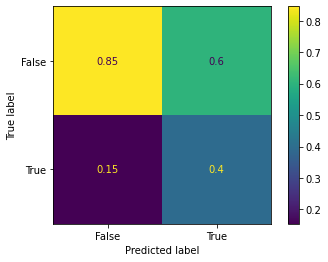

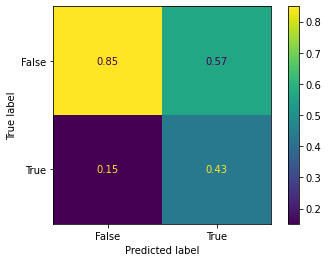

In [ ]:
#visualisation of confusion matrixes
metrics.plot_confusion_matrix(algo_1, X_test_1_stand, y_test_1, normalize="pred")
plt.show() 
metrics.plot_confusion_matrix(algo_2, X_test_2_stand, y_test_2, normalize="pred")
plt.show() 


In [ ]:
print("dokładność modelu 1: ", algo_1.score(X_test_1, y_test_1))
print("dokładność modelu 2: ", algo_2.score(X_test_2, y_test_2))

dokładność modelu 1:  0.8318965517241379
dokładność modelu 2:  0.8372881355932204


In [ ]:
# counting TPR(true positive rate) and FPR(false positive rate)
FP_value_1, TP_value_1, prog_prawd_1 = metrics.roc_curve(y_test_1, pred_prawd_1)
FP_value_2, TP_value_2, prog_prawd_2 = metrics.roc_curve(y_test_2, pred_prawd_2)
print(FP_value_1, TP_value_1)
print(FP_value_2, TP_value_2)

In [ ]:
#calculation of AUC (AREA UNDER CURVE)
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test_1, prediction_1, pos_label=1)
print(metrics.auc(fpr_1,tpr_1))
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, prediction_2, pos_label=1)
print(metrics.auc(fpr_2,tpr_2))

0.5465823037066561
0.5413855150697255


>10. Opracuj wykres krzywej `ROC` oraz oblicz współczynnik powierzchni pod krzywą `ROC` (`AUCROC`).

In [ ]:
#Area under ROC_1 and ROC_2
ROC_score_1 = metrics.roc_auc_score(y_test_1, pred_prawd_1)
print("ROC_1: ",ROC_score_1)
ROC_score_2 = metrics.roc_auc_score(y_test_2, pred_prawd_2)
print("ROC_2: ",ROC_score_2)

ROC_1:  0.7655606483326691
ROC_2:  0.7997732043784676


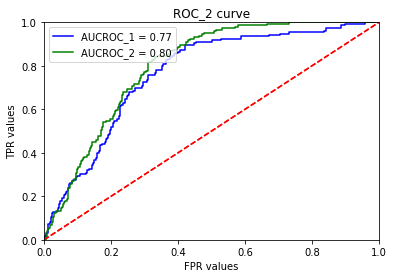

In [ ]:
#Plotting the ROC Curve for df_1_encoded and df_2_encoded
plt.plot(FP_value_1, TP_value_1, "b", label = "AUCROC_1 = %0.2f" % ROC_score_1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "upper left")
plt.ylabel("TPR values")
plt.xlabel("FPR values")
plt.title("ROC_1 curve")
plt.plot(FP_value_2, TP_value_2, "g", label = "AUCROC_2 = %0.2f" % ROC_score_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "upper left")
plt.ylabel("TPR values")
plt.xlabel("FPR values")
plt.title("ROC_2 curve")
plt.show()

>11. Przeprowadź proces walidacji krzyrzowej `cross_val_score()` (gdzie `n_splits=5`) wykorzystując cały zbiór danych przed podziałem na zbiór uczący i treningowy. 

In [ ]:
#datasets before transformation
#cross validation process
df_1_encoded.head()
df_2_encoded.head()

Name  Absolute Magnitude  ...  Orbit Uncertainity_9  Hazardous
0  3703080                21.6  ...                     0       True
1  3723955                21.3  ...                     0      False
2  2446862                20.3  ...                     0       True
3  3092506                27.4  ...                     0      False
4  3514799                21.6  ...                     0       True

[5 rows x 109 columns]

In [ ]:
X_1 = df_1_encoded.drop(axis=1, columns ='Hazardous')
X_2 = df_2_encoded.drop(axis=1, columns ='Hazardous')
Y_1 = df_1_encoded['Hazardous'].astype(int)
Y_2 = df_2_encoded['Hazardous'].astype(int)
print(X_1)
print(Y_1)

         Name  Absolute Magnitude  ...  Orbit Uncertainity_8  Orbit Uncertainity_9
0     3703080              21.600  ...                     0                     0
1     3723955              21.300  ...                     0                     0
2     2446862              20.300  ...                     0                     0
3     3092506              27.400  ...                     0                     0
4     3514799              21.600  ...                     0                     0
...       ...                 ...  ...                   ...                   ...
4682  3759007              23.900  ...                     1                     0
4683  3759295              28.200  ...                     0                     0
4684  3759714              22.700  ...                     0                     0
4685  3759720              21.800  ...                     0                     0
4686  3772978              19.109  ...                     0                     0

[46

In [ ]:
# creation of datasets for crossvalidation
X_cross_1 = X_1.values
Y_cross_1 = Y_1.values.astype(int)

X_cross_2 = X_2.values
Y_cross_2 = Y_2.values.astype(int)

print("X:", X_cross_1, sep="\n")
print("y:", Y_cross_1, sep="\n")

X:
[[3.70308000e+06 2.16000000e+01 1.27219878e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.72395500e+06 2.13000000e+01 1.46067964e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.44686200e+06 2.03000000e+01 2.31502122e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.75971400e+06 2.27000000e+01 7.66575574e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.75972000e+06 2.18000000e+01 1.16025908e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.77297800e+06 1.91090000e+01 4.00640618e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
y:
[1 0 1 ... 0 0 0]


In [ ]:
# creation of method of standarization of data
standaryzacja_1 = preprocessing.StandardScaler()
standaryzacja_2 = preprocessing.StandardScaler()
# model choice
algo_1_1 = linear_model.LogisticRegression()
algo_2_1 = linear_model.LogisticRegression()
# creation of standarization process and usage of logistic regression algorithm
process_1 = pipeline.make_pipeline(standaryzacja_1, algo_1_1)
process_2 = pipeline.make_pipeline(standaryzacja_2, algo_2_1)
# crossvalidation setting
validation_1 = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)
validation_2 = model_selection.KFold(n_splits=5, shuffle=True, random_state=2020)
# model creation with cross validation of accuracy
model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1, #None - domyślnie 5CV
                                scoring = "accuracy", 
                                n_jobs = -1).mean()

0.836853448275862

In [ ]:
#check of accuracy of model 2
model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2, #None - domyślnie 5CV
                                scoring = "accuracy", 
                                n_jobs = -1).mean() 

0.8446815962369303

>12. Porównaj wyniki modelu z/bez walidacji krzyrzowej, poprzez wyliczenie: **dokładności, pewności, precyzji i wskaźnika F1.** <br>
Wskazówka: przy podejściu walidacji krzyrzowej, są to wartości średnie.

In [ ]:
print("without cross validation: ")

print("accuracy model 1:", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                scoring = "accuracy", 
                                n_jobs = -1).mean())
print("accuracy model 2:", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                scoring = "accuracy", 
                                n_jobs = -1).mean() )
print("recall model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                scoring = "recall", 
                                n_jobs = -1).mean())
print("recall model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                scoring = "recall", 
                                n_jobs = -1).mean())
print("precision model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                scoring = "precision", 
                                n_jobs = -1).mean())
print("precision model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                scoring = "precision", 
                                n_jobs = -1).mean())
print("F1 model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                scoring = "f1", 
                                n_jobs = -1).mean())
print("F1 model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                scoring = "f1", 
                                n_jobs = -1).mean())

print("\nwith cross validation:")
print("accuracy model 1:", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1, #None - domyślnie 5CV
                                scoring = "accuracy", 
                                n_jobs = -1).mean())
print("accuracy model 2:", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2, #None - domyślnie 5CV
                                scoring = "accuracy", 
                                n_jobs = -1).mean() )
print("recall model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1,
                                scoring = "recall", 
                                n_jobs = -1).mean())
print("recall model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2,
                                scoring = "recall", 
                                n_jobs = -1).mean())
print("precision model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1,
                                scoring = "precision", 
                                n_jobs = -1).mean())
print("precision model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2,
                                scoring = "precision", 
                                n_jobs = -1).mean())
print("F1 model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1,
                                scoring = "f1", 
                                n_jobs = -1).mean())
print("F1 model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2,
                                scoring = "f1", 
                                n_jobs = -1).mean())


without cross validation: 
accuracy model 1:  0.8318965517241379
accuracy model 2:  0.8372881355932204
accuracy model 1: 0.8357758620689655
accuracy model 2: 0.8428690850525348
recall model 1:  0.1717439293598234
recall model 2:  0.14477611940298507
precision model 1:  0.4958136828491252
precision model 2:  0.45337050018946573
F1 model 1:  0.25101193732261806
F1 model 2:  0.21662395922839636

with cross validation:
accuracy model 1: 0.836853448275862
accuracy model 2: 0.8446815962369303
recall model 1:  0.17097226960524314
recall model 2:  0.14747423295071596
precision model 1:  0.4910159251012409
precision model 2:  0.4588777182657232
F1 model 1:  0.25293629258976724
F1 model 2:  0.22201310903032562


>13. Sprawdź czy różni się poziom **pewności, precyzji i wskaźnik F1**, jeżeli uwzględnimy fakt nierówności liczby obserwacji w różnych klasach. Przykładowo, możesz to zrobić poprzez wykorzystanie: `cross_val_score(...scoring = "f1_weighted"...)` dla wskaźnika F1.

In [ ]:
print("weighted scoring recall model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1,
                                scoring = "recall_weighted", 
                                n_jobs = -1).mean())
print("weighted scoring recall model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2,
                                scoring = "recall_weighted", 
                                n_jobs = -1).mean())
print("weighted scoring precision model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1,
                                scoring = "precision_weighted", 
                                n_jobs = -1).mean())
print("weighted scoring precision model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2,
                                scoring = "precision_weighted", 
                                n_jobs = -1).mean())
print("weighted scoring F1 model 1: ", model_selection.cross_val_score(process_1, 
                                X_cross_1, 
                                Y_cross_1, 
                                cv = validation_1,
                                scoring = "f1_weighted", 
                                n_jobs = -1).mean())
print("weighted scoring F1 model 2: ", model_selection.cross_val_score(process_2, 
                                X_cross_2, 
                                Y_cross_2, 
                                cv = validation_2,
                                scoring = "f1_weighted", 
                                n_jobs = -1).mean())


weighted scoring recall model 1:  0.836853448275862
weighted scoring recall model 2:  0.8446815962369303
weighted scoring precision model 1:  0.7987571580102473
weighted scoring precision model 2:  0.8027878551108009
weighted scoring F1 model 1:  0.802311846789349
weighted scoring F1 model 2:  0.8087632668281532


>14. Przeprowadź redukcję wymiarowości poprzez analizę głównych składowych PCA. Zredukuj liczbę zmiennych objaśniających do 3 wymiarów. Zwizualizuj przygotowane zmienne na wykresie 3D, dodając informację o przynależności do klasy `Hazardous`, np. poprzez zmianę koloru. Czy na wykresie widać jawne skupiska klas?<br> *Wskazówka: przykładowe metody do wizualizacji znajdziesz w Lekcji 7.*

In [ ]:
## Reduction to 3 dimensions
# compressors creation
compressor_pca_1 = decomposition.PCA(n_components=3)
compressor_pca_2 = decomposition.PCA(n_components=3)
# wyuczenie kompresora
fit_pca_1 = compressor_pca_1.fit(X_1)
fit_pca_2 = compressor_pca_2.fit(X_2)
# użycie kompresora
X_3D_1 = fit_pca_1.transform(X_1)
print(X_3D_1)
X_3D_2 = fit_pca_2.transform(X_2)
print(X_3D_2)

[[-4.28579758e+05 -2.03229061e+00 -2.54253068e-02]
 [-4.49454758e+05 -2.40645560e+00 -4.40587917e-02]
 [ 8.27638242e+05  6.92059777e-01 -2.42375854e-01]
 ...
 [-4.85213758e+05 -1.09118059e+00 -7.86757786e-02]
 [-4.85219758e+05 -2.00052212e+00 -8.58185973e-02]
 [-4.98477758e+05 -4.72569323e+00 -1.12474165e-01]]
[[-3.65849235e+05 -1.99627541e+00 -3.39095958e-02]
 [-3.86724235e+05 -2.36255477e+00 -4.77964206e-02]
 [ 8.90368765e+05  2.43395144e-01 -3.05602148e-01]
 ...
 [-4.22483235e+05 -1.03262817e+00 -1.43073113e-01]
 [-4.22489235e+05 -1.94130713e+00 -8.03214991e-02]
 [-4.35747235e+05 -4.65731773e+00 -1.53631294e-01]]


In [ ]:
# 3D show for model 1
X_3D_df_1 = pd.DataFrame(X_3D_1, columns=["x1", "x2", "x3"])
X_3D_df_1["Hazardous"] = Y_1.astype(int)
wykres_1 = px.scatter_3d(X_3D_df_1,
                       x="x1",
                       y="x2",
                       z="x3",
                       color="Hazardous")
wykres_1.show()

In [ ]:
# 3D show for model 2
X_3D_df_2 = pd.DataFrame(X_3D_2, columns=["x1", "x2", "x3"])
X_3D_df_2["Hazardous"] = Y_2.astype(int)
wykres_2 = px.scatter_3d(X_3D_df_2,
                       x="x1",
                       y="x2",
                       z="x3",
                       color="Hazardous")
wykres_2.show()

>15. Podziel się wynikiem w grupie na [FB](https://bit.ly/2OSyHaG) podając hashtag `#modul6`.